Model: DQN Proactive-N, Predicted runtime at 200 flights: 0.088 seconds
Model: DQN Proactive-U, Predicted runtime at 200 flights: 0.092 seconds
Model: DQN Reactive, Predicted runtime at 200 flights: 0.079 seconds
Model: Greedy Reactive, Predicted runtime at 200 flights: 5.116 seconds


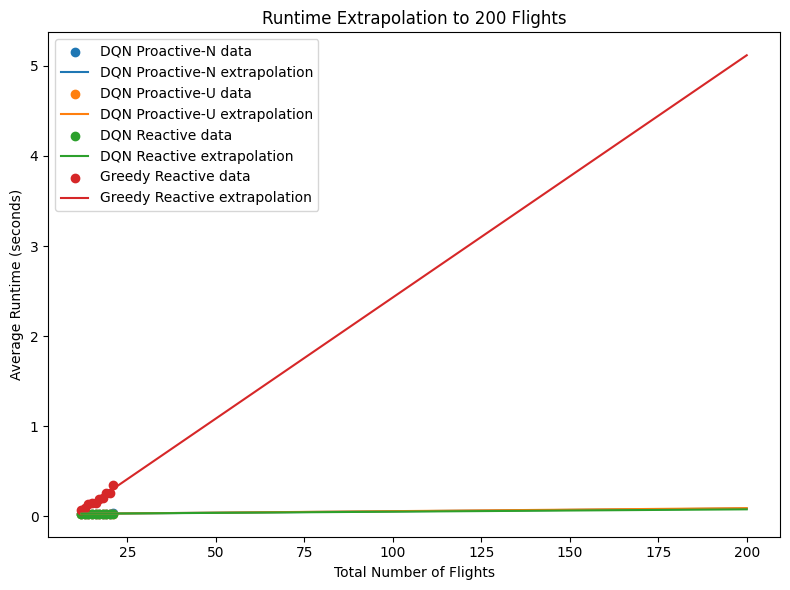

In [1]:
#!/usr/bin/env python3
"""
Extrapolate runtimes from a CSV file to 200 flights for each model and plot them.
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


def main():
    # Read the CSV file in the same folder
    df = pd.read_csv("runtime_analysis_by_total_flights.csv")

    # Get unique model names
    models = df["model_name"].unique()

    # Create a figure for the plots
    plt.figure(figsize=(8, 6))

    for model in models:
        # Filter the dataframe by model
        model_data = df[df["model_name"] == model]

        # Prepare data for linear regression
        x = model_data["total_number_of_flights"].values.reshape(-1, 1)
        y = model_data["average_runtime_seconds"].values.reshape(-1, 1)

        # Create and fit the model
        reg = LinearRegression()
        reg.fit(x, y)

        # Predict runtime for 200 flights
        predicted_runtime_200 = reg.predict([[200]])[0][0]

        # Create a range for plotting predictions
        x_range = np.linspace(x.min(), 200, 50).reshape(-1, 1)
        y_pred = reg.predict(x_range)

        # Plot the original data
        plt.scatter(x, y, label=f"{model} data")

        # Plot the regression line up to 200 flights
        plt.plot(x_range, y_pred, label=f"{model} extrapolation")

        print(f"Model: {model}, Predicted runtime at 200 flights: {predicted_runtime_200:.3f} seconds")

    # Label the plot
    plt.title("Runtime Extrapolation to 200 Flights")
    plt.xlabel("Total Number of Flights")
    plt.ylabel("Average Runtime (seconds)")
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()


if __name__ == "__main__":
    main()
